# Programming for DataAnalysis Assignment

This notebook contains my submission for the project for the Programming for Data Analysis module, Winter 2022.

I have selected to analyse Airbnb listings in Dublin, Ireland. This analysis will focus on rating scores.

Problem Statement:

For this project you must create a data set by simulating a real-world phenomenon of your choosing. You may pick any phenomenon you wish – you might pick one that is of interest to you in your personal or professional life. Then, rather than collect data
related to the phenomenon, you should model and synthesise such data using Python. We suggest you use the numpy.random package for this purpose. Specifically, in this project you should:

* Choose a real-world phenomenon that can be measured and for which you could collect at least one-hundred data points across at least four different variables.
* Investigate the types of variables involved, their likely distributions, and their relationships with each other. * Synthesise/simulate a data set as closely matching their properties as possible.
* Detail your research and implement the simulation in a Jupyter notebook – the data set itself can simply be displayed in an output cell within the notebook.

Note that this project is about simulation – you must synthesise a data set. Some students may already have some real-world data sets in their own files. It is okay to base your synthesised data set on these should you wish (please reference it if you do), but the main task in this project is to create a synthesised data set. The next section
gives an example project idea.

### Assumptions

We assume that all the data from data sources (Airbnb) is correct in terms of values, addresses and their corresponsing location.

Prices of properties are not affected by seasonality.

![Image2](https://www.independent.ie/news/b7e3b/41599548.ece/AUTOCROP/w1240/AIRBNB-IPOFEES%20SPARE)

### Step 1: Import required libraries

In [2]:
# NumPy for numerical operations
import numpy as np

# Pandas for data analysis
import pandas as pd

# Statistics for descriptive statistics
import statistics

# Matplotlib.pyplot for plotting
import matplotlib.pyplot as plt

# sklearn
import sklearn.neighbors as nei

### Step 2: Import the CSV file

An initial analysis was done on the data in the CSV file with some plots and charts produced.

In [12]:
# import the cvs file from web source.

pd.read_csv("listings.csv")

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,4.407700e+04,https://www.airbnb.com/rooms/44077,2.022090e+13,12/09/2022,city scrape,cosy comfortable Irish cottage twin,Our house was built in 1937 when there was ple...,I like our neighbourhood as there is no shorta...,https://a0.muscache.com/pictures/525706/050a3a...,193005,...,4.93,4.66,4.82,NaN,f,2,0,2,0,1.85
1,8.515600e+04,https://www.airbnb.com/rooms/85156,2.022090e+13,12/09/2022,city scrape,Cosy Comfortable Irish Cottage 1 Double Bed,Our Cottage is a charming light filled cottage...,"I love Dundrum and its surrounding areas ,<br ...",https://a0.muscache.com/pictures/1749253/9ed2a...,193005,...,4.88,4.64,4.78,NaN,f,2,0,2,0,1.53
2,1.598890e+05,https://www.airbnb.com/rooms/159889,2.022090e+13,12/09/2022,city scrape,Friendly Single Room,Washing can be done at a cost of €5 per load....,Plenty of buses into the city and the area is ...,https://a0.muscache.com/pictures/3031697/a8259...,766611,...,4.90,4.63,4.74,NaN,f,3,0,3,0,2.78
3,1.628090e+05,https://www.airbnb.com/rooms/162809,2.022090e+13,11/09/2022,city scrape,5.5 miles south of Dublin City :^),A nice place to relax after the bustle of the ...,"Close to the sea, hill walks and the city - vi...",https://a0.muscache.com/pictures/86694529/c07b...,777681,...,4.97,4.77,4.85,NaN,f,2,0,2,0,3.68
4,1.658280e+05,https://www.airbnb.com/rooms/165828,2.022090e+13,11/09/2022,city scrape,Pádraig Pearse apt. Kilmainham,"Don't just visit Dublin, experience Dublin in ...","Enjoy a walk along the grand canal, or just ob...",https://a0.muscache.com/pictures/34311419/b3f6...,790601,...,4.75,4.34,4.55,NaN,t,5,5,0,0,0.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7561,7.129090e+17,https://www.airbnb.com/rooms/712909401324393615,2.022090e+13,12/09/2022,city scrape,Comfortable double room with private bathroom,Comfortable double room with private bathroom ...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,38652370,...,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN
7562,7.129140e+17,https://www.airbnb.com/rooms/712914322433199115,2.022090e+13,12/09/2022,city scrape,Welcome 1-bedroom available. Free parking & Wi-Fi,Single room available in family home. Bus rout...,NaN,https://a0.muscache.com/pictures/4c044921-f6fd...,89156390,...,NaN,NaN,NaN,NaN,f,2,0,2,0,NaN
7563,7.129140e+17,https://www.airbnb.com/rooms/712914393022526732,2.022090e+13,11/09/2022,city scrape,Cheerful 5-bedroom Home Friendly Irish Welcome,Forget your worries in this spacious and seren...,"Fantastic transport routes, 5 mins from luas g...",https://a0.muscache.com/pictures/53ed618c-3c14...,128213034,...,NaN,NaN,NaN,NaN,t,2,0,2,0,NaN
7564,7.129660e+17,https://www.airbnb.com/rooms/712966369602352444,2.022090e+13,12/09/2022,city scrape,Double Bedroom in Private Home,Large double room with panoramic views of Fr. ...,Clongriffin dart station and 15 bus close by. ...,https://a0.muscache.com/pictures/miso/Hosting-...,256847071,...,NaN,NaN,NaN,NaN,t,1,0,1,0,NaN


In [3]:
# Having an initial look at the data

df = pd.read_csv("listings.csv")
df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,44077.0,https://www.airbnb.com/rooms/44077,2.022090e+13,12/09/2022,city scrape,cosy comfortable Irish cottage twin,Our house was built in 1937 when there was ple...,I like our neighbourhood as there is no shorta...,https://a0.muscache.com/pictures/525706/050a3a...,193005,...,4.93,4.66,4.82,NaN,f,2,0,2,0,1.85
1,85156.0,https://www.airbnb.com/rooms/85156,2.022090e+13,12/09/2022,city scrape,Cosy Comfortable Irish Cottage 1 Double Bed,Our Cottage is a charming light filled cottage...,"I love Dundrum and its surrounding areas ,<br ...",https://a0.muscache.com/pictures/1749253/9ed2a...,193005,...,4.88,4.64,4.78,NaN,f,2,0,2,0,1.53
2,159889.0,https://www.airbnb.com/rooms/159889,2.022090e+13,12/09/2022,city scrape,Friendly Single Room,Washing can be done at a cost of €5 per load....,Plenty of buses into the city and the area is ...,https://a0.muscache.com/pictures/3031697/a8259...,766611,...,4.90,4.63,4.74,NaN,f,3,0,3,0,2.78
3,162809.0,https://www.airbnb.com/rooms/162809,2.022090e+13,11/09/2022,city scrape,5.5 miles south of Dublin City :^),A nice place to relax after the bustle of the ...,"Close to the sea, hill walks and the city - vi...",https://a0.muscache.com/pictures/86694529/c07b...,777681,...,4.97,4.77,4.85,NaN,f,2,0,2,0,3.68
4,165828.0,https://www.airbnb.com/rooms/165828,2.022090e+13,11/09/2022,city scrape,Pádraig Pearse apt. Kilmainham,"Don't just visit Dublin, experience Dublin in ...","Enjoy a walk along the grand canal, or just ob...",https://a0.muscache.com/pictures/34311419/b3f6...,790601,...,4.75,4.34,4.55,NaN,t,5,5,0,0,0.48


In [4]:
# Continuing to review the csv file

df = pd.read_csv("listings.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7566 entries, 0 to 7565
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            7566 non-null   float64
 1   listing_url                                   7566 non-null   object 
 2   scrape_id                                     7566 non-null   float64
 3   last_scraped                                  7566 non-null   object 
 4   source                                        7566 non-null   object 
 5   name                                          7566 non-null   object 
 6   description                                   7411 non-null   object 
 7   neighborhood_overview                         4194 non-null   object 
 8   picture_url                                   7566 non-null   object 
 9   host_id                                       7566 non-null   i

In [5]:
# Score review

Score_location = df.loc[:,'review_scores_location']
Score_location.describe()

count    6081.000000
mean        4.732065
std         0.352586
min         1.000000
25%         4.630000
50%         4.820000
75%         5.000000
max         5.000000
Name: review_scores_location, dtype: float64

(array([6.000e+00, 0.000e+00, 1.000e+01, 3.000e+00, 0.000e+00, 4.800e+01,
        4.000e+01, 2.760e+02, 9.630e+02, 4.735e+03]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

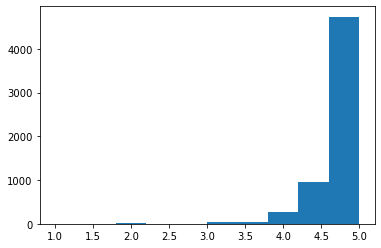

In [6]:
# Plot a histogram of score_location

plt.hist(Score_location, bins=10)

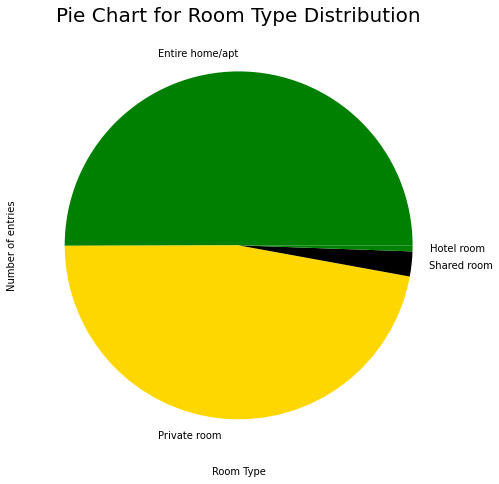

In [7]:
# Pie chart of Room Type

df['room_type'].value_counts().plot(kind = 'pie', colors=['green', 'gold', 'black'], figsize = (8, 8))
plt.title('Pie Chart for Room Type Distribution', fontsize = 20)
plt.xlabel('Room Type')
plt.ylabel('Number of entries')
plt.show()

Text(0.5, 1.0, 'Distribution of reviews in the top neighbourhoods')

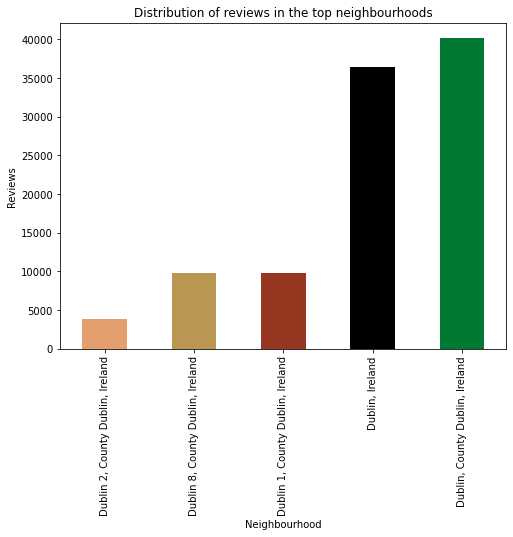

In [8]:
# Distribution of neighbourhoods, unfortunately the csv file did not have a detailed breakdown of locations in Dublin, Ireland,
# however for illustrative purposes, plot was added.


neighs = df.groupby('neighbourhood')
reviews = neighs['number_of_reviews'].sum().sort_values().tail(5)

reviews.plot(kind = 'bar', color=['#e59e6d', '#ba9653', '#963821', 'black', '#007a33'], figsize = (8, 6))
plt.xlabel('Neighbourhood')
plt.ylabel('Reviews')
plt.title('Distribution of reviews in the top neighbourhoods')

In [9]:
# Distribution of neighbourhoods, unfortunately the csv file did not have a detailed breakdown of locations in Dublin, Ireland,
# however for illustrative purposes, code was included.

res = df['neighbourhood'].value_counts()
# We want the most common neighbourhood, thus the head of the list
neig = res.keys().tolist()[0]
# And also the properties it has
n_props = res.tolist()[0]
print("The neighbourhood with the most listings is {} with {} properties".format(neig, n_props))

The neighbourhood with the most listings is Dublin, County Dublin, Ireland with 1127 properties


In [10]:
# Code used to remove any possible duplicates.

df.drop_duplicates(subset=['id'], keep='first', inplace=True)
df.reset_index()

,index,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,0,4.407700e+04,https://www.airbnb.com/rooms/44077,2.022090e+13,12/09/2022,city scrape,cosy comfortable Irish cottage twin,Our house was built in 1937 when there was ple...,I like our neighbourhood as there is no shorta...,https://a0.muscache.com/pictures/525706/050a3a...,...,4.93,4.66,4.82,NaN,f,2,0,2,0,1.85
1,1,8.515600e+04,https://www.airbnb.com/rooms/85156,2.022090e+13,12/09/2022,city scrape,Cosy Comfortable Irish Cottage 1 Double Bed,Our Cottage is a charming light filled cottage...,"I love Dundrum and its surrounding areas ,<br ...",https://a0.muscache.com/pictures/1749253/9ed2a...,...,4.88,4.64,4.78,NaN,f,2,0,2,0,1.53
2,2,1.598890e+05,https://www.airbnb.com/rooms/159889,2.022090e+13,12/09/2022,city scrape,Friendly Single Room,Washing can be done at a cost of €5 per load....,Plenty of buses into the city and the area is ...,https://a0.muscache.com/pictures/3031697/a8259...,...,4.90,4.63,4.74,NaN,f,3,0,3,0,2.78
3,3,1.628090e+05,https://www.airbnb.com/rooms/162809,2.022090e+13,11/09/2022,city scrape,5.5 miles south of Dublin City :^),A nice place to relax after the bustle of the ...,"Close to the sea, hill walks and the city - vi...",https://a0.muscache.com/pictures/86694529/c07b...,...,4.97,4.77,4.85,NaN,f,2,0,2,0,3.68
4,4,1.658280e+05,https://www.airbnb.com/rooms/165828,2.022090e+13,11/09/2022,city scrape,Pádraig Pearse apt. Kilmainham,"Don't just visit Dublin, experience Dublin in ...","Enjoy a walk along the grand canal, or just ob...",https://a0.muscache.com/pictures/34311419/b3f6...,...,4.75,4.34,4.55,NaN,t,5,5,0,0,0.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7540,7560,7.127800e+17,https://www.airbnb.com/rooms/712780155240462339,2.022090e+13,12/09/2022,city scrape,Comfortable Double Room in South Dublin.,Double Room with a comfortable bed (Emma Mattr...,House is located just off the N4 between Lucan...,https://a0.muscache.com/pictures/miso/Hosting-...,...,NaN,NaN,NaN,NaN,t,1,0,1,0,NaN
7541,7561,7.129090e+17,https://www.airbnb.com/rooms/712909401324393615,2.022090e+13,12/09/2022,city scrape,Comfortable double room with private bathroom,Comfortable double room with private bathroom ...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,...,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN
7542,7562,7.129140e+17,https://www.airbnb.com/rooms/712914322433199115,2.022090e+13,12/09/2022,city scrape,Welcome 1-bedroom available. Free parking & Wi-Fi,Single room available in family home. Bus rout...,NaN,https://a0.muscache.com/pictures/4c044921-f6fd...,...,NaN,NaN,NaN,NaN,f,2,0,2,0,NaN
7543,7564,7.129660e+17,https://www.airbnb.com/rooms/712966369602352444,2.022090e+13,12/09/2022,city scrape,Double Bedroom in Private Home,Large double room with panoramic views of Fr. ...,Clongriffin dart station and 15 bus close by. ...,https://a0.muscache.com/pictures/miso/Hosting-...,...,NaN,NaN,NaN,NaN,t,1,0,1,0,NaN


In [26]:
# the first thing i want to do is get rid of any listings that haven't yet been reviewed - the presumption being that these may not have the historical data
df = pd.read_csv("listings.csv")
df.dropna(subset=['first_review'], inplace=True)
df.drop(columns=['first_review'], inplace= True)

In [27]:
# Need to remove some columns/noise as many columns are not relevant to this analysis and some contain free text also:

df = pd.read_csv("listings.csv")
df.drop(['listing_url','picture_url','host_is_superhost','neighbourhood_cleansed'], axis = 1, inplace=True)
df.drop(df.columns[[1,2]], axis = 1, inplace=True)

Please note I had identified a number of columns in my dataset that were not required but was unable to remove. I found that I was spending too much time on this troubleshooting. While I have included some code above to illustrate part of the processing of the data, I subsequently made a second version of my CSV file and named it listingsV2. This was done in order to continue with my Synthesising element to the project with my desired data and ensure that I would not spend my whole time troubleshooting.

# Synthesising the Data

Scikit-learn: A machine leanring library that provides almostall the machine leanring algorithms you might need. Schikit-learn is designed to be interpolated into NumPy and SciPy.

### Libraries:

In [1]:
import sklearn.neighbors as nei
import pandas as pd

### Data:

In [2]:
df = pd.read_csv("listingsV2.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'listingsV2.csv'

### Visualise:

In [ ]:
import seaborn as sns
sns.pairplot(df, hue="review_scores_rating")

### Inputs and Outputs:

In [5]:
inputs = df[['number_of_reviews','host_listings_count','host_id']]
outputs = df['review_scores_rating']

### Classifier

In [6]:
knn = nei.KNeighborsClassifier(n_neighbors=5)

### Fit:

In [7]:
knn.fit(inputs, outputs)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

### Predict:

In [ ]:
df.loc[0]

In [ ]:
knn.predict([1.2,2.3,3.4])

In [1]:
# Needed for plotting
import matplotlib.colors
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Needed for generating classification, regression and clustering datasets
import sklearn.datasets as dt

# Needed for generating data from an existing dataset
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV

In [ ]:
# Define the seed so that results can be reproduced
seed = 11
rand_state = 11

# Define the color maps for plots
color_map = plt.cm.get_cmap('RdYlBu')
color_map_discrete = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","cyan","magenta","blue"])

In [ ]:
rand = np.random.RandomState(seed)    

dist_list = ['uniform','normal','exponential','lognormal','chisquare','beta']
param_list = ['-1,1','0,1','1','0,1','2','0.5,0.9']
colors_list = ['green','blue','yellow','cyan','magenta','pink']

# Code below = rough work...

### Inputs & Outputs

In [ ]:
inputs = df[['host_id','host_listings_count','review_scores_location','Room Type','number_of_reviews']]
outputs = df['airbnb']

### Classifier

In [31]:
knn = nei.KNeighborsClassifier#(n_neighbors=5)

### Fit

In [ ]:
knn.fit(inputs, outputs)

### Predict

In [ ]:
df.loc[0]

In [ ]:
knn.predict([5.2,3.7,1.6,0.4])

In [33]:
# Make your first synthetic dataset

# https://gist.github.com/daradecic/0adda093b03662d1fdad7cfb8a9b868c#file-synthetic_datasets-py


import numpy as np 
import pandas as pd
from sklearn.datasets import make_classification

import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

In [34]:
# https://gist.github.com/daradecic/4de58fd33520f9545d42bd6268604c8f#file-synthetic_datasets-py

X, y = make_classification(
    n_samples=1000, 
    n_features=2, 
    n_redundant=0,
    n_clusters_per_class=1,
    random_state=42
)

df = pd.concat([pd.DataFrame(X), pd.Series(y)], axis=1)
df.columns = ['x1', 'x2', 'y']
# 5 random rows
df.sample(5)

,x1,x2,y
237,1.425806,0.395832,1
717,-0.299930,-1.614764,0
337,2.225690,0.370845,1
147,1.438846,0.599422,1
220,-0.286801,1.849179,1


![Image](https://qtxasset.com/cdn-cgi/image/w=850,h=478,f=auto,fit=crop,g=0.5x0.5/https://qtxasset.com/quartz/qcloud1/media/image/hotelmanagement/1546632060/Airbnb%20Logo.png/Airbnb%20Logo.png?VersionId=ThlQLEp0zFaHTe_93YSLwNNOHeweU0sd)

Project Requirement - Problem Statement:

Scope:

Variables to Investigage:
Background
Analysis
Plotting Results
Conclusion
References & Data Sources
Conclusion

1. Introduction
2. Data Exploration
3. plots/grahps
4. Examining relationships
5. Interpreting the Data
6. Snthesising the Data
7. Graphical Representation of the data
8. Concatenating the data
9. Conclusion

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
names = ['number_of_reviews', 'host_listings_count', 'host_id']

dataset = pd.read_csv("listings.csv", names=names)

In [5]:
dataset.head()

,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,number_of_reviews,host_listings_count,host_id
id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
44077,https://www.airbnb.com/rooms/44077,2.02209E+13,12/09/2022,city scrape,cosy comfortable Irish cottage twin,"Our house was built in 1937 when there was plenty of land ,originally Dundrum was considered a Spa town because of it recuperative powers it is only 10 kilometres to the mountains,& yet we are only 6 kilometres to the city centre ! Dublin is a small compact city ,<br />Our Guests tell us they sleep like logs ,We do provide good mattresses too though ! <br />When you are a guest at our house we recognise that this is YOUR holiday so we endeavour to do the best we can to make it as memorable as possible ,<br /><br /><b>The space</b><br />Hi,<br />My name is Teresa and we have 3 rooms available in our lovely home in Dublin 14 .<br /><br />Our 4 bedroomed cottage is situated in Dundrum about 4 miles from Dublin City Centre. We have 2 Bedrooms each with two full sized single beds, in each room suitable for 2 people . We have a beautifully furnished Double Bedroom with a lovely comfortable Double Bed suitable for couples. Both of our rooms have fireplaces and are tastefully furn","I like our neighbourhood as there is no shortage of things to do ,there is a large Park nearby ,plus loads of restaurants and pubs & supermarkets ,<br />Everything is available a short walk away ,<br /><br />The sea and the mountains are not far away and neither is the city it's 6 kilometres away ,all easily accessable <br />We are in a great location to explore the city & it's environs",https://a0.muscache.com/pictures/525706/050a3aa9_original.jpg,193005,https://www.airbnb.com/users/show/193005,Teresa,06/08/2010,"Dublin, Ireland","I am a friendly outgoing Irishwoman ,who loves literature,travel and design. I love meeting people and am always fascinated at how diverse we all are and yet we are all the very same ,I love travel and visiting new places and seeing all different cultures ,\r\nI like having fun , \r\n",within an hour,100%,99%,t,https://a0.muscache.com/im/users/193005/profile_pic/1297774104/original.jpg?aki_policy=profile_small,https://a0.muscache.com/im/users/193005/profile_pic/1297774104/original.jpg?aki_policy=profile_x_medium,Churchtown,2,2,"['email', 'phone']",t,t,"Churchtown, Ireland",Dn Laoghaire-Rathdown,NaN,53.29178,-6.25792,Private room in bungalow,Private room,2,NaN,1.5 shared baths,1,2,"[""Oven"", ""Hot water kettle"", ""Fire extinguisher"", ""Outdoor furniture"", ""Dining table"", ""Hangers"", ""Indoor fireplace"", ""Long term stays allowed"", ""Carbon monoxide alarm"", ""Cooking basics"", ""Breakfast"", ""Mi

In [31]:
dataset.drop(dataset.columns[[2,3,5]], axis=1)

IndexError: index 3 is out of bounds for axis 0 with size 3

In [15]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,:4].values



In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

ValueError: could not convert string to float: 'calculated_host_listings_count_private_rooms'